In [1]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.coordinates as c
from astroplan import Observer, FixedTarget
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord,EarthLocation, AltAz
import astropy.units as u
import astropy
import numpy as np
import matplotlib.pyplot as plt

time_range = Time(["2024-10-07 10:00", "2024-10-08 10:00"])

In [2]:
##your source here??? 

# source= SkyCoord("24.55", "-1.05", frame="galactic", unit="deg")

# source= SkyCoord("24.55", "-1.05", frame="j2000",)

# ra, dec = c.Angle("1.34416 ", unit='radian'), c.Angle('0.454845', unit='radian')
ra, dec = c.Angle("10:01:50.6 ", unit='hourangle'), c.Angle('37:36:49.1', unit='deg')

sky_coords = c.SkyCoord(ra, dec, frame='icrs')
print(sky_coords)
print (sky_coords.ra.to(u.radian),sky_coords.dec.to(u.radian))

<SkyCoord (ICRS): (ra, dec) in deg
    (150.46083333, 37.61363889)>
2.62604 rad 0.656482 rad


In [3]:

longitude = -7.9219 * u.deg
latitude = 53.0950 * u.deg
latitude = 66.0950 * u.deg

elevation = 72.0 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)
birr = Observer(location=location, name="Birr", timezone="GMT")
observer = Observer(name='I-LOFAR',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               description="LOFAR Station IE613")

In [15]:
target_table = Table.read('IE613_sources.txt', format='ascii')[4:9]
target_table

col1,col2,col3
str12,float64,float64
J0311+1402,47.83419999957191,14.041499999496727
FRB20240114A,321.91599999999625,4.329538999999841
FRB20201124A,77.01469499030473,26.060698832627928
FRB20180301A,93.2271087613265,4.67105561353789
J1012+5307,153.13932686666664,53.11729541111111


In [16]:
targets = [FixedTarget(coord=SkyCoord(f"{ra} {dec}",unit=(u.deg, u.deg)), name=name)
           for name, ra, dec in target_table]

# target = [FixedTarget(coord=SkyCoord(f"{ra} {dec}",unit=(u.deg, u.deg)), name=name)]


In [17]:
for i in targets:
    print (i.ra.to(u.radian),i.dec.to(u.radian))

0.834864 rad 0.24507 rad
5.61849 rad 0.0755647 rad
1.34416 rad 0.454845 rad
1.62712 rad 0.0815253 rad
2.67279 rad 0.927072 rad


In [18]:
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
constraints = [AltitudeConstraint(15*u.deg, 90*u.deg)]

In [19]:
from astroplan import is_observable, is_always_observable, months_observable
# Are targets *ever* observable in the time range?
ever_observable = is_observable(constraints, observer, targets, time_range=time_range)

# Are targets *always* observable in the time range?
always_observable = is_always_observable(constraints, observer, targets, time_range=time_range)

In [20]:
from astroplan import observability_table
table = observability_table(constraints, observer, targets, time_range=time_range)
print(table)

target name  ever observable always observable fraction of time observable
------------ --------------- ----------------- ---------------------------
  J0311+1402            True             False          0.4791666666666667
FRB20240114A            True             False          0.3541666666666667
FRB20201124A            True             False                       0.625
FRB20180301A            True             False          0.3541666666666667
  J1012+5307            True              True                         1.0


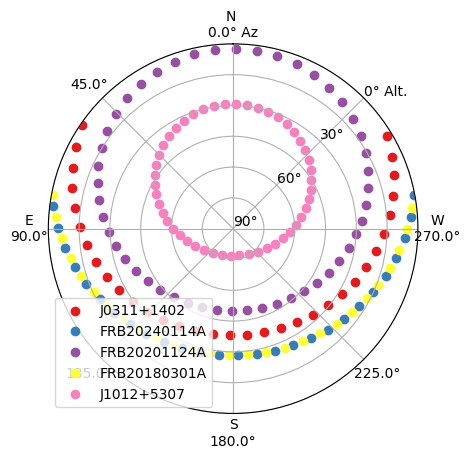

In [21]:
from astroplan.plots import plot_sky
from matplotlib import cm
from astroplan import time_grid_from_range
time_grid = time_grid_from_range(time_range)
cmap=cm.Set1
for i, target in enumerate(targets):
    ax = plot_sky(target, observer, time_grid,
                  style_kwargs=dict(color=cmap(float(i)/len(targets)),
                                    label=target.name))

legend = ax.legend(loc='lower left')
legend.get_frame().set_facecolor('w')
plt.show()

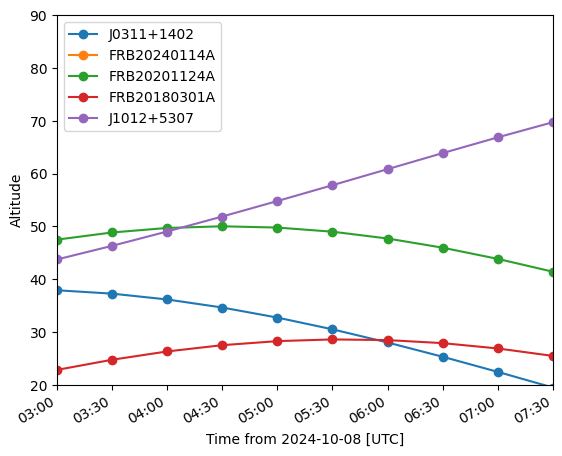

In [22]:
from astroplan.plots import plot_altitude
# don't touch these, just a hack to get an hour of units
start_time=Time("2024-10-07 08:00")
second_time=Time("2024-10-07 09:00")
dh=second_time.tt-start_time.tt

### enter you day here
start_time=Time("2024-10-08 03:00")
## set how long you want to plot
observe_time=start_time+np.arange(0,5,0.5)*dh

## plot
plot_altitude(targets=targets,observer=observer,time=observe_time,min_altitude=20)
sunaltaz=observer.sun_altaz(time=observe_time)
# plot_altitude(targets=sunaltaz,observer=observer,time=observe_time,min_altitude=10)
plt.legend()
plt.savefig("ilofar targets.png")